In [57]:
import tensorflow as tf
import tensorflow_hub as hub

In [58]:
print(f'TensorFlow Version: {tf.__version__}')
print(f'TensorFlow Hub Version: {hub.__version__}')

TensorFlow Version: 2.17.0
TensorFlow Hub Version: 0.16.1


In [59]:
print('GPU', "available (YESSS!!!!)" if tf.config.list_physical_devices('GPU') else 'not available :(')

GPU available (YESSS!!!!)


# Getting our Data ready

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
labels_csv = pd.read_csv('/content/drive/MyDrive/Data Science/dog-breed-identification/labels.csv')
labels_csv

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [62]:
print(labels_csv.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126


<Axes: xlabel='breed'>

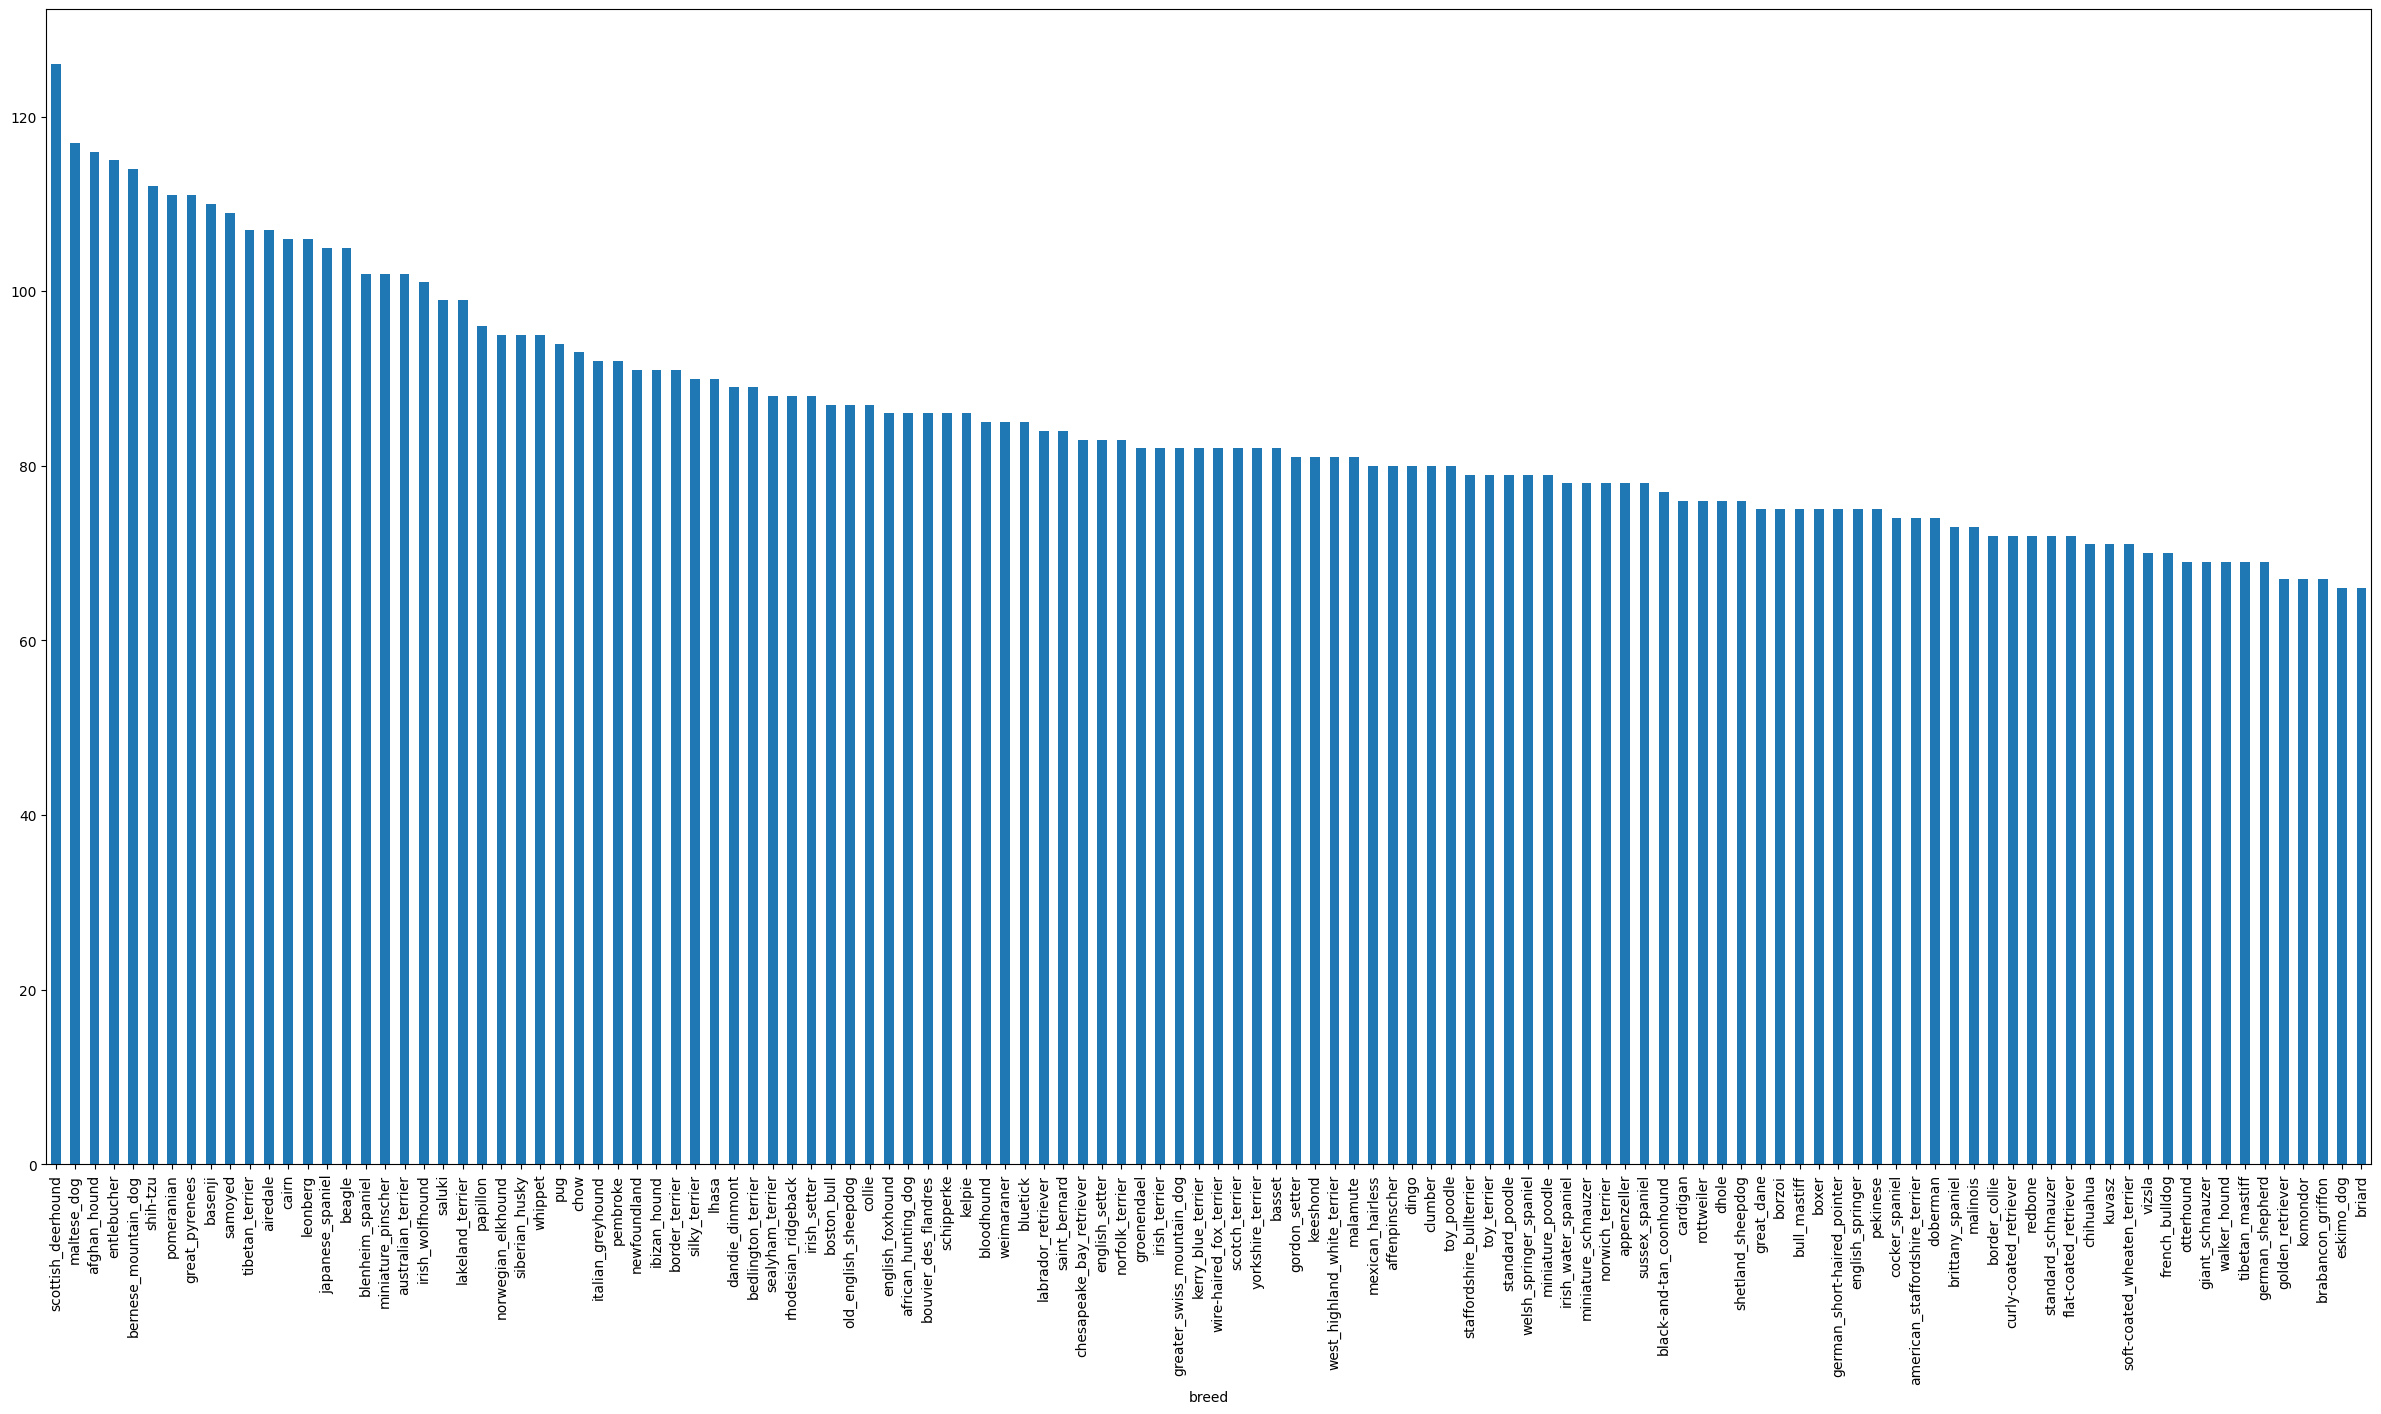

In [63]:
# How many images are there of each breed?

labels_csv['breed'].value_counts().plot.bar(figsize=(30,15))

In [64]:
labels_csv['breed'].value_counts().median()

82.0

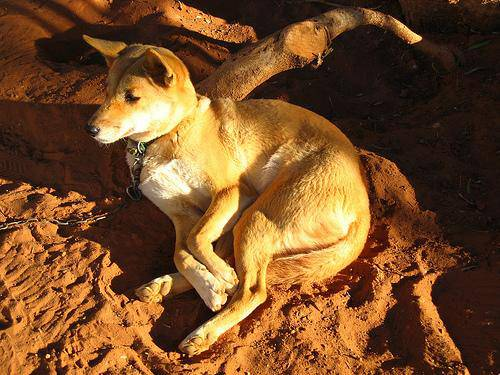

In [65]:
# Lets view an image
from IPython.display import Image
Image('/content/drive/MyDrive/Data Science/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg')

In [66]:
# Create pathnames for all files

filenames = ['/content/drive/MyDrive/Data Science/dog-breed-identification/train/' + fname + '.jpg' for fname in labels_csv['id']]

len(filenames)

10222

In [67]:
filenames[:10]

['/content/drive/MyDrive/Data Science/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Data Science/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Data Science/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Data Science/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Data Science/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Data Science/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Data Science/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Data Science/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Data Science/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dat

In [68]:
# Check the number of images
import os
if len(os.listdir('/content/drive/MyDrive/Data Science/dog-breed-identification/train/')) == len(filenames):
  print('YESSS!!!')
else:
  print('NOOOO!!!')

NOOOO!!!


In [69]:
len(os.listdir('/content/drive/MyDrive/Data Science/dog-breed-identification/train/'))

10242

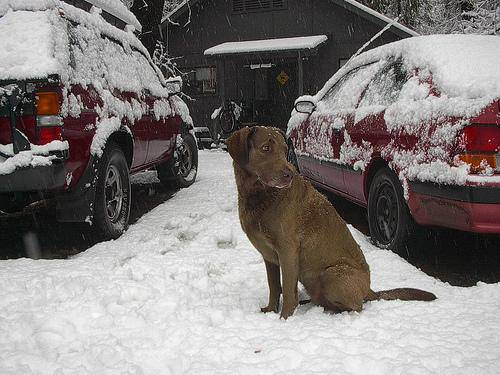

In [70]:
Image(filenames[10221])

In [71]:
labels_csv['breed'][10221]

'chesapeake_bay_retriever'

# Lets prepare our labels

In [72]:
labels = labels_csv['breed'].to_numpy()
# labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [73]:
# Find the unique label values
UniqueBreeds = np.unique(labels)
UniqueBreeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [74]:
# Turn every label into a boolean array

boolean_labels = [label == UniqueBreeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [75]:
len(boolean_labels)

10222

In [76]:
# Example: Turning boolean array into integers
print(labels[0])
print(np.where(UniqueBreeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [77]:
boolean_labels_int = [label.astype(int) for label in boolean_labels]
boolean_labels_int[:2]

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]

In [78]:
# Setup X and y
X = filenames
y = boolean_labels

In [79]:
NUM_IMAGES = 5000 #@param {type:"slider", min: 1000, max: 10000, step: 1000}

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(X_val), len(y_train), len(y_val)

(4000, 1000, 4000, 1000)

# Preprocessing Images (Turning images into Tensors)

To preprocess our images into Tensors we're going to write a fuction which does a few things:

1. Take an image filepath as input.
2. Use TensorFlow to read the file and save it to a variable, `image`.
3. Turn our `image` (a jpg) into Tensors.
4. Normalize our `image` (Covert colour channel values from 0-255 to 0-1).
5. Resize the `image` to be a shape of (224,224).
6. Return the modified `image`.


In [81]:
image  = plt.imread(filenames[42])
image.shape

(257, 350, 3)

In [82]:
image[:2]

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)

In [83]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [84]:
# Define an Image
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor
  """

  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Covert the colour channel values from 0-255 to 0-1.
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224,224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [85]:
# Create a function to return a tuple(image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label)
  """
  image = process_image(image_path)
  return image, label

In [86]:
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [87]:
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles data if its training databut doesn't shuffle if its validation data.
  Also accpets test data as input (no_labels).
  """

  # If the data is test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # Only file paths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is valid dataset, we dont need to shuffle it
  elif valid_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  # If the data is training data
  else:
    print("creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels

    # Shuffling pathnames and labels before mapping image processorfunction is
    # faster than shuffling the images
    data = data.shuffle(buffer_size=len(X))

    data = data.map(get_image_label)

    data_batch = data.batch(BATCH_SIZE)

    return data_batch

In [88]:
# creating Training and validation data batches
train_data = create_data_batches(X_train, y_train)
valid_data = create_data_batches(X_val, y_val, valid_data=True)

creating training data batches...
Creating test data batches...


In [89]:
# Check out the different attributes of our data batches
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [90]:
# create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """

  # Setup figure
  plt.figure(figsize=(20,20))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 cols)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the images label as title
    plt.title(UniqueBreeds[labels[i].argmax()])
    # Turn the grid lines off
    # plt.axis('off')

In [91]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[7.93202162e-01, 7.97123730e-01, 7.42221713e-01],
          [9.72871065e-01, 9.72871065e-01, 9.26268935e-01],
          [9.86720741e-01, 9.86720741e-01, 9.47038591e-01],
          ...,
          [7.19000459e-01, 7.58005023e-01, 8.00285220e-01],
          [5.42201102e-01, 5.88960767e-01, 6.37026250e-01],
          [2.89653122e-01, 3.48476648e-01, 3.63689423e-01]],
 
         [[8.27594936e-01, 8.31516504e-01, 7.76614547e-01],
          [9.35751319e-01, 9.35751319e-01, 8.88692498e-01],
          [9.77514565e-01, 9.77514565e-01, 9.37493563e-01],
          ...,
          [7.12966919e-01, 7.52987802e-01, 8.00851822e-01],
          [5.28571904e-01, 5.82388401e-01, 6.27153873e-01],
          [2.85474747e-01, 3.47769111e-01, 3.66643459e-01]],
 
         [[9.74427640e-01, 9.76420879e-01, 9.25375581e-01],
          [9.54660833e-01, 9.54660833e-01, 9.07602012e-01],
          [9.33532178e-01, 9.33532178e-01, 8.93511117e-01],
          ...,
          [7.01057136e-01, 7.46974051e-01, 8.0105

In [92]:
# show_25_images(train_images, train_labels)

In [93]:
val_images, val_labels = next(valid_data.as_numpy_iterator())

In [94]:
# show_25_images(val_images, val_labels)

# Building a Model

## Before we build a model, there are few things we need to define:
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use.

In [95]:
# Setup Input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

# Setup Output shape of our model
OUTPUT_SHAPE = len(UniqueBreeds)

In [96]:
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4'

In [97]:
# !pip install tf_keras

In [98]:
from keras.models import Sequential
from keras.layers import Dense
import tf_keras as tfk

In [99]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print('create a model with: ', model_url)

    # setup the model
    model = tfk.Sequential([
        hub.KerasLayer(model_url),
                       tfk.layers.Dense(units=output_shape, activation='softmax')
                       ])

    # compile the model
    model.compile(
        loss=tfk.losses.CategoricalCrossentropy(),
        optimizer=tfk.optimizers.Adam(),
        metrics=['accuracy']
    )

    # build the model
    model.build(input_shape)

    return model

In [100]:
import datetime

In [101]:
# !pip uninstall tensorflow
# !pip uninstall keras

In [102]:
# !pip install tensorflow

In [103]:
# %load_ext tensorboard

In [104]:
# from tensorflow.keras.callbacks import TensorBoard
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [105]:
# # callbacks preparation
# def create_tf_callback():
#     logdir = os.path.join('/content/drive/MyDrive/Data Science/dog-breed-identification/logs',
#                          datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

#     return TensorBoard(logdir,)

# # early stopping for callbacks
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
#                                             patience=3)

# # ... rest of your code (no changes needed)

# ***Training the Model***

In [106]:
NUM_EPOCHS = 10 #@param {type:'slider', min: 10, max: 100, step: 10}

In [107]:
# build a function for train model
def train_model():
    # create a new tensorboard
    # tensorboard = create_tf_callback()
    model = create_model()
    # model training
    model.fit(train_data,
          epochs=NUM_EPOCHS,
          validation_data=valid_data,
          # callbacks=[tensorboard, early_stopping]
         )

    return model

In [108]:
model = train_model()

create a model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/10
125/125 [==============================] - 141s 1s/step - loss: 2.1592 - accuracy: 0.5065 - val_loss: 0.9401 - val_accuracy: 0.7540
Epoch 2/10
125/125 [==============================] - 21s 169ms/step - loss: 0.4925 - accuracy: 0.8780 - val_loss: 0.7622 - val_accuracy: 0.7890
Epoch 3/10
125/125 [==============================] - 21s 166ms/step - loss: 0.2409 - accuracy: 0.9557 - val_loss: 0.7384 - val_accuracy: 0.7840
Epoch 4/10
125/125 [==============================] - 19s 152ms/step - loss: 0.1457 - accuracy: 0.9800 - val_loss: 0.7152 - val_accuracy: 0.7870
Epoch 5/10
125/125 [==============================] - 21s 165ms/step - loss: 0.0958 - accuracy: 0.9910 - val_loss: 0.7113 - val_accuracy: 0.7840
Epoch 6/10
125/125 [==============================] - 20s 157ms/step - loss: 0.0678 - accuracy: 0.9950 - val_loss: 0.7138 - val_accuracy: 0.7860
Epoch 7/10
125/125 [==================

In [127]:
custom_path = '/content/Test_images/'
custom_img_path = [custom_path + fname for fname in os.listdir(custom_path)]

In [128]:
custom_img_path

['/content/Test_images/english-dog-breeds-4788340-hero-14a64cf053ca40f78e5bd078b052d97f.jpg',
 '/content/Test_images/istockphoto-467550114-612x612.jpg',
 '/content/Test_images/toy-dog-breeds-great-pets-5114832-03-76ec3f8ce0b840f097959b2e38db4bca.jpg',
 '/content/Test_images/images.jfif',
 '/content/Test_images/dog.jpg']

In [129]:
custom_data = create_data_batches(custom_img_path, test_data=True)
custom_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [130]:
custom_preds = model.predict(custom_data)

1/1 [==============================] - 1s 697ms/step


In [131]:
custom_preds.shape

(5, 120)

In [132]:
custom_preds_labels = [UniqueBreeds[custom_preds[i].argmax()] for i in range(len(custom_preds))]
custom_preds_labels

['boxer', 'rottweiler', 'pug', 'german_shepherd', 'labrador_retriever']

In [133]:
custom_images = []

for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

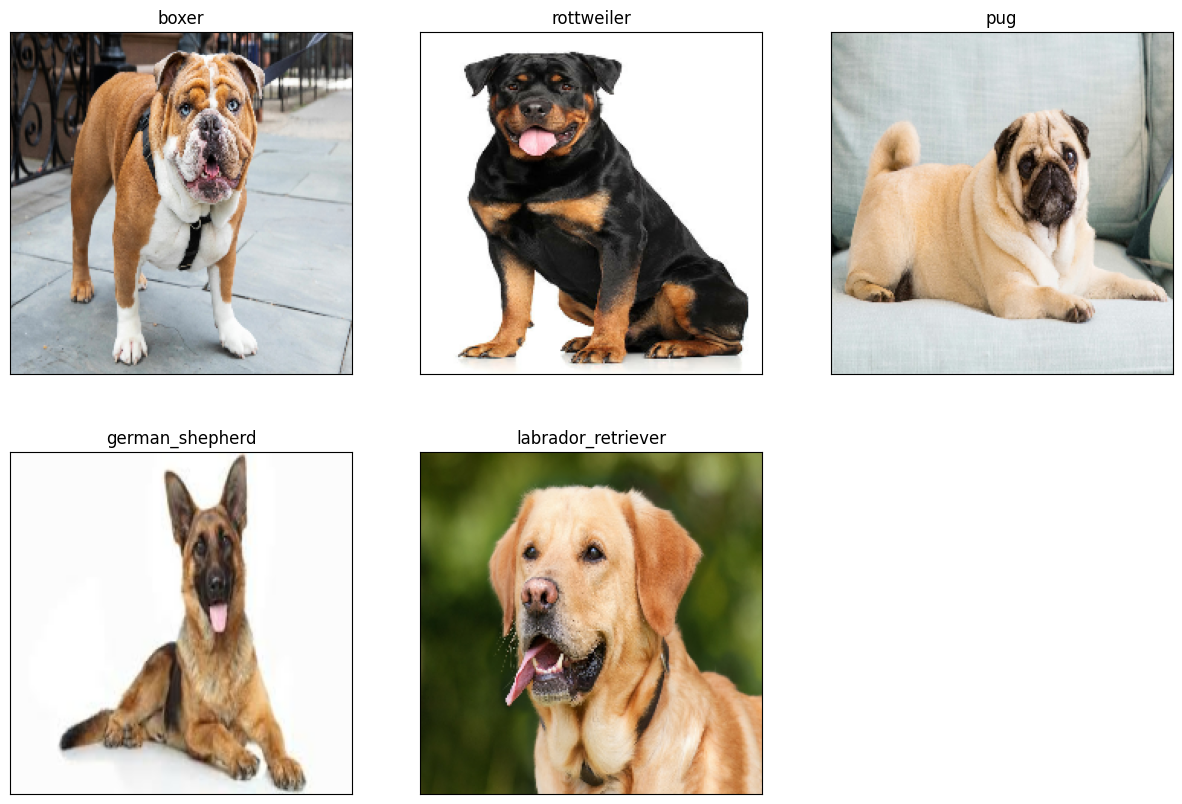

In [137]:
plt.figure(figsize=(15,10))
for i, image in enumerate(custom_images):
  plt.subplot(2, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_preds_labels[i])
  plt.imshow(image)

In [141]:
model.save('/content/drive/MyDrive/Data Science/dog-breed-identification/DogsBreed.h5')

/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
